<a href="https://colab.research.google.com/github/haripy123/ML-scratch-codes/blob/main/emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Dense,Flatten

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

100% 1.98G/1.98G [01:47<00:00, 20.9MB/s]
100% 1.98G/1.98G [01:47<00:00, 19.7MB/s]


In [4]:
from zipfile import ZipFile
zp=ZipFile('/content/emotion-recognition-dataset.zip')
zp.extractall()
zp.close()

In [5]:
train_data,val_data=keras.utils.image_dataset_from_directory('/content/dataset',
                                              image_size=(256,256),
                                              validation_split=0.2,
                                              subset='both',
                                              seed=12,
                                              batch_size=64)

Found 15453 files belonging to 6 classes.
Using 12363 files for training.
Using 3090 files for validation.


In [6]:
classes=train_data.class_names

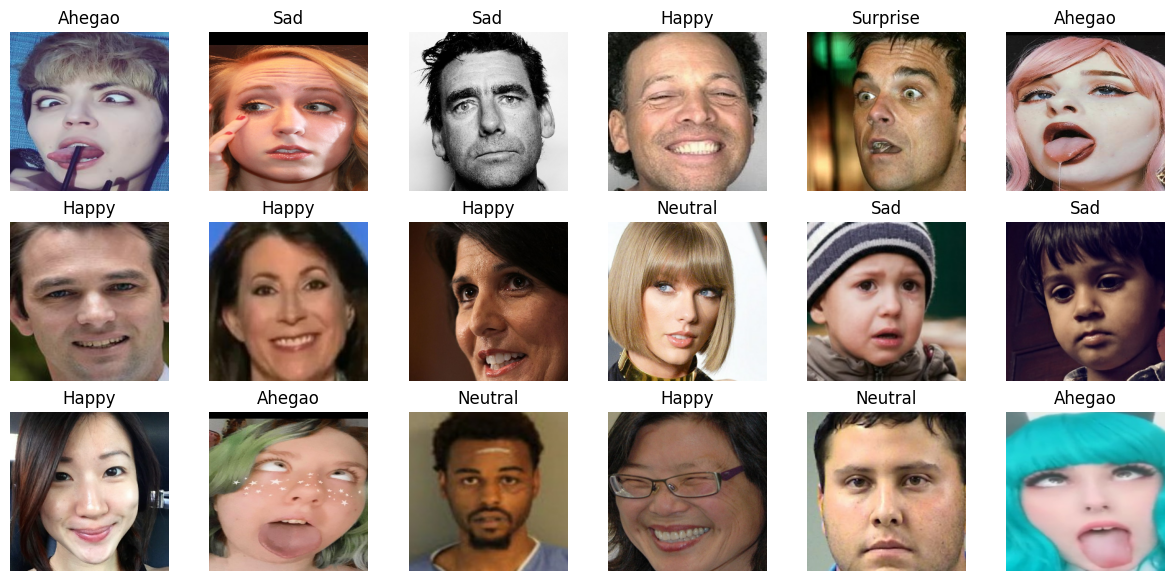

In [7]:
plt.figure(figsize=(15,7))
for img,label in train_data.take(1):
  for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(classes[label[i]])
    plt.axis('off')

In [8]:
@tf.autograph.experimental.do_not_convert
def scale_img(img,label):
  return img/255.,label

In [9]:
train_data_new,val_data_new=train_data.map(scale_img),val_data.map(scale_img)

In [10]:
train_ds=train_data_new.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds=val_data_new.cache().prefetch(tf.data.AUTOTUNE)

In [11]:
model=Sequential()
model.add(Conv2D(32,3,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(64,3,2,activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(len(classes)))

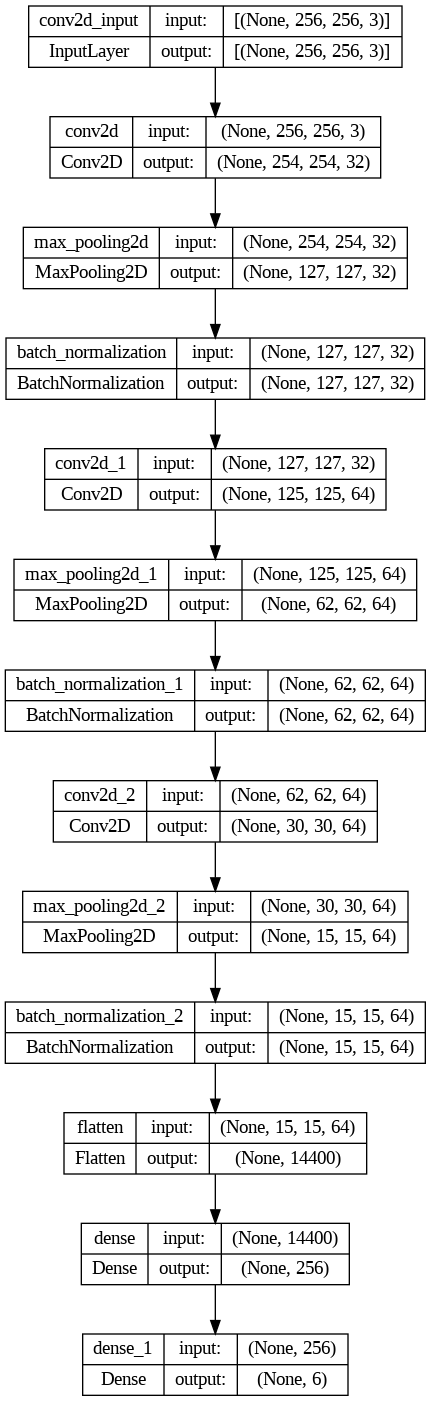

In [12]:
keras.utils.plot_model(model,show_shapes=True)

In [13]:
loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile('adam',loss=loss,metrics='acc')

In [ ]:
history=model.fit(train_ds,epochs=20,validation_data=val_data)

Epoch 1/20
